# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [1]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cu

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [36]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [3]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import cv2
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from torchvision.transforms import v2

# You may add any imports you need

In [4]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [5]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2024-08-12 09:56:05--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ed781r6u2d8de61xxhcq6/dataset.zip?rlkey=vkvp4kdp03m42ceprg95cg0ax&dl=1 [following]
--2024-08-12 09:56:05--  https://www.dropbox.com/scl/fi/ed781r6u2d8de61xxhcq6/dataset.zip?rlkey=vkvp4kdp03m42ceprg95cg0ax&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4d0d6913d4556cabb51783bdc1.dl.dropboxusercontent.com/cd/0/inline/CYeebIFW-UFR3vsZjDldl6Fhd6rsFEdDaJYcpztCkfu9cEN-lIpW9lWZlHjwLRt5A4xCliL0Dw_-AsI2dIPeTqg9wFeCZm-GTE90AO_bl516XYfvEIqe82lxLlnp77aMCTs/file?dl=1# [following]
--2024-08-12 09:56:06--  https://uc4d0d6913d4556cabb51783bdc1.dl.dropboxusercontent.com/cd/0/inline/CYe

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [6]:
# Посчитаю среднее и диспервию для датасета
# train_dataset = ImageFolder('train', transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]))
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset))
#
# img, _ = next(iter(train_dataloader))
#
# print(img.mean([0, 2, 3]).tolist())
# print(img.std([0, 2, 3]).tolist())

# [0.4802479147911072, 0.4480719268321991, 0.3975490629673004]
# [0.27698642015457153, 0.2690644860267639, 0.2820819318294525]

In [7]:
# Буду использовать стандартную аугментацию из torchvision
# использую v2 по примеру отсюда - https://pytorch.org/vision/main/transforms.html


train_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
        v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
        v2.RandomApply([v2.RandomEqualize()], p=0.25),
        v2.RandomPerspective(distortion_scale=0.2, p=0.25),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
                     std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
    ]
)
val_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
                     std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
    ]
)
train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform)

BATCH_SIZE = 256

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                              num_workers=6, persistent_workers=True)  # YOUR CODE HERE
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, num_workers=6, persistent_workers=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

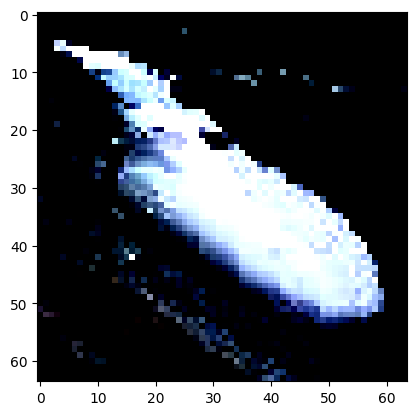

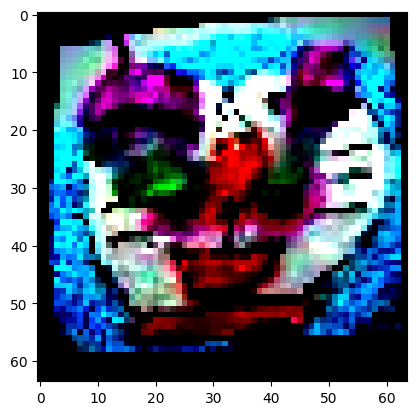

In [9]:
for batch in train_dataloader:  # Хочу также посмотреть на аугментированные картинки
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break
# Картинки выглядят не очень понятные, но скорее всего они просто не правильно выводятся данным способом

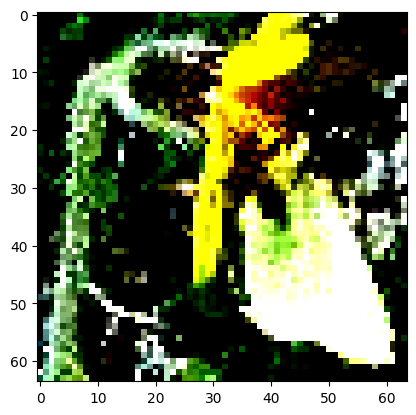

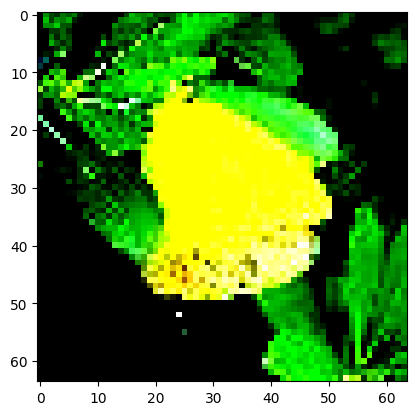

In [10]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [11]:
# Также параллельно буду обучать densenet121

from torchvision.models import densenet121


class YourNet3(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = densenet121(weights=None)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor().to(device)
        self.preds = torch.Tensor().to(device)

        # Сделаю промежуточный слой на полтора входных слоя (1500), чтобы найти более сложные паттерны
        # И сделаю выход на 200 слоёв. Также добавлю дропауты, и заменю функцию активации
        in_features = self.model.classifier.in_features
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=in_features,
                      out_features=1500, bias=True),
            nn.BatchNorm1d(1500, eps=0.001, momentum=0.1, affine=True),
            nn.SiLU(inplace=True),
            nn.Dropout(p=0.25, inplace=True),
            nn.Linear(in_features=1500,
                      out_features=200, bias=True),
        )

    def _forward(self, x):
        # runs the Neural Network
        return self.model(x)  #.squeeze()

    def forward(self, images, target=None):
        images = images.to(device)
        output = self._forward(images)
        loss = None
        if target is not None:
            target = target.to(device)
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target), 0).to(device)
            pred = torch.argmax(output, dim=-1).to(device)
            self.preds = torch.cat((self.preds, pred), 0).to(device)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [12]:
from timm.scheduler import StepLRScheduler


class YourModule3(pl.LightningModule):
    def __init__(self, model, learning_rate, loss):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.loss = loss

    def forward(self, x):
        result = self.model(x)  #.squeeze()
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        # добавлю scheduler https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
        scheduler = StepLRScheduler(optimizer=optimizer, decay_t=10)
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]

    def lr_scheduler_step(self, scheduler, metric):
        scheduler.step(epoch=self.current_epoch)

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        predictions = self(images)
        loss = self.loss(predictions, target)  #.squeeze())
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        predictions = self(images)
        # loss
        loss = self.loss(predictions, target)  #.squeeze())
        # accuracy with softmax
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        # log
        self.log("val_loss", loss, prog_bar=True, logger=True)
        self.log("accuracy", acc, prog_bar=True, logger=True)
        return loss

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [37]:
wandb_logger = WandbLogger(
    log_model='all')

In [15]:
model3 = YourNet3().to(device)
module3 = YourModule3(model3, 0.001, nn.CrossEntropyLoss())

In [38]:
run = wandb.init(project="hw2_t1_test1")

In [17]:
EPOCHS = 16 # лучший результат на экспериментах

In [18]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=EPOCHS, accelerator=device)  # YOUR CODE HERE
trainer.fit(module3, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | YourNet3         | 8.8 M  | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
8.8 M     Trainable params
0         Non-trainable params
8.8 M     Total params
35.178    Total estimated model 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=16` reached.


In [19]:
torch.save(module3.state_dict(), "t1_final_weights.pth")

accuracy,▁▃▄▅▅▆▆▇▇▇▇█████
epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
train_loss,█▇▆▆▆▅▄▅▄▄▄▄▄▄▃▃▃▃▃▃▃▂▃▂▂▂▂▃▂▂▂▂▁▂▂▁▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
val_loss,█▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁
accuracy,0.4676
epoch,15
train_loss,1.7122
trainer/global_step,6255
val_loss,2.31919


### Валидация результатов задания

Вместо evaluate_task буду использовать trainer.validate из pytorch lighting

In [43]:
validate_trainer = pl.Trainer(logger=False)
validation = validate_trainer.validate(module3,
                              val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:516: You called `self.log('val_loss', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/module.py:516: You called `self.log('accuracy', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.4675999879837036     │
│         val_loss          │     2.319192886352539     │
└───────────────────────────┴───────────────────────────┘

In [44]:
run.finish()

In [45]:
acc = validation[0]["accuracy"]

In [46]:
print(f"accuracy = {acc}")
print(f"Оценка за это задание составит {np.clip(10 * acc / 0.44, 0, 10):.2f} баллов")

accuracy = 0.4675999879837036
Оценка за это задание составит 10.00 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [47]:
# Возьму ViT_B_16_Weights, потому что эта модель в 4 раза меньше по GFLOPS и требует определённый размер картинки (чтобы точно знать насколько ресайзить). Также поменяю шедулер на StepLR, так как со TanhLRScheduler обучение получается слишком дёрганным и возможно дело в нём
# Также уменьшу размер классификатора (до этого он был 1280-2560-1080-200)

In [48]:
from torchvision.models import vit_b_16, ViT_B_16_Weights

In [49]:
trained_model2 = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth

  0%|          | 0.00/330M [00:00<?, ?B/s]
  2%|▏         | 6.50M/330M [00:00<00:05, 64.5MB/s]
  4%|▍         | 14.0M/330M [00:00<00:04, 72.1MB/s]
  6%|▋         | 21.0M/330M [00:00<00:04, 66.1MB/s]
  8%|▊         | 27.6M/330M [00:00<00:04, 66.3MB/s]
 10%|█         | 34.5M/330M [00:00<00:04, 68.1MB/s]
 13%|█▎        | 41.5M/330M [00:00<00:04, 69.3MB/s]
 15%|█▍        | 48.8M/330M [00:00<00:04, 71.2MB/s]
 17%|█▋        | 56.0M/330M [00:00<00:03, 72.0MB/s]
 19%|█▉        | 63.8M/330M [00:00<00:03, 74.5MB/s]
 21%|██▏       | 71.0M/330M [00:01<00:03, 73.9MB/s]
 24%|██▎       | 78.1M/330M [00:01<00:04, 65.6MB/s]
 26%|██▌       | 85.1M/330M [00:01<00:03, 67.6MB/s]
 28%|██▊       | 91.8M/330M [00:01<00:03, 68.0MB/s]
 30%|██▉       | 98.4M/330M [00:01<00:03, 68.4MB/s]
 32%|███▏      | 105M/330M [00:01<00:03, 69.1MB/s] 
 34%|███▍      | 112M/330M [00:01<00:03, 70

In [50]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [51]:
trained_model2.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [52]:
# Теперь по гайду отсюда - https://medium.com/@pwrxndr/pytorch-transfer-learning-how-to-choose-the-right-model-ed4ad94c8b02
# Я заморожу все слои модели, а последний, классификатор, заменю и обучу
for param in trained_model2.parameters():
    param.requires_grad = False

In [53]:
trained_model2.heads = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=768,
              out_features=1080, bias=True),
    nn.BatchNorm1d(1080, eps=0.001, momentum=0.1, affine=True),
    nn.SiLU(inplace=True),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1080,
              out_features=200, bias=True),
)

In [55]:
!pip install torchinfo

In [56]:
from torchinfo import summary

summary(model=trained_model2,
        input_size=(1, 3, 224, 224),  #[batch_size, color_channels, height, width]
        col_names=['input_size', 'output_size', 'num_params', 'trainable'],
        col_width=20,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224]     [1, 200]             768                  Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224]     [1, 768, 14, 14]     (590,592)            False
├─Encoder (encoder)                                          [1, 197, 768]        [1, 197, 768]        151,296              False
│    └─Dropout (dropout)                                     [1, 197, 768]        [1, 197, 768]        --                   --
│    └─Sequential (layers)                                   [1, 197, 768]        [1, 197, 768]        --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]        [1, 197, 768]        (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]        [1, 1

In [57]:
# Буду использовать стандартную аугментацию из torchvision
# использую v2 по примеру отсюда - https://pytorch.org/vision/main/transforms.html

from torchvision.transforms import v2

train_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.Resize((224, 224)),
        v2.RandomApply([v2.RandomRotation(degrees=15)], p=0.25),
        v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
        v2.RandomApply([v2.RandomEqualize()], p=0.25),
        v2.RandomPerspective(distortion_scale=0.2, p=0.25),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
                     std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
    ]
)
val_transform = v2.Compose(
    [
        v2.ToImage(),
        v2.ToDtype(torch.uint8, scale=True),
        v2.Resize((224, 224)),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
                     std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
    ]
)
train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform)

BATCH_SIZE = 256

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                              num_workers=4, persistent_workers=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, num_workers=4, persistent_workers=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Тренировочный класс lightning

In [58]:
from timm.scheduler import StepLRScheduler


class MyModule(pl.LightningModule):
    def __init__(self, m, learning_rate, loss):
        super().__init__()
        self.model = m
        self.learning_rate = learning_rate
        self.loss = loss

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        # добавлю scheduler https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
        scheduler = StepLRScheduler(optimizer=optimizer, decay_t=1)  # lr будет уменьшаться каждые 20 эпох
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]

    def lr_scheduler_step(self, scheduler, metric):
        scheduler.step(epoch=self.current_epoch)

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        predictions = self.forward(images)
        loss = self.loss(predictions, target)  #.squeeze())
        self.log("train_loss", loss, prog_bar=True, logger=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        predictions = self.forward(images)
        # loss
        loss = self.loss(predictions, target)  #.squeeze())
        # accuracy with softmax
        acc = accuracy(torch.argmax(predictions, dim=-1).long(), target.long(), task="multiclass", num_classes=200)
        # log
        self.log("val_loss", loss, prog_bar=True, logger=True)
        self.log("accuracy", acc, prog_bar=True, logger=True)
        return loss

In [59]:
module = MyModule(trained_model2, 0.001, nn.CrossEntropyLoss())  # YOUR CODE HERE

In [60]:
EPOCHS = 3

In [61]:
run3 = wandb.init(project="hw2_t2_test1")

In [62]:
wandb_logger = WandbLogger(
    log_model='all')

In [63]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs=EPOCHS, accelerator=device)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:396: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | VisionTransformer | 86.8 M | train
1 | loss  | CrossEntropyLoss  | 0      | train
----------------------------------------------------
1.0 M     Trainable params
85.8 M    Non-trainable params
86.8 M    Total params
347.390   Total estimated m

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


### Валидация результатов задания

In [64]:
# Модель начала переобучаться уже на третьей эпохе, так что я её остановил. Возможно не хватило аугментаций, но всё равно результат даже после первой эпохи был для меня рекордным 0.836
validation = trainer.validate(module, val_dataloader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         accuracy          │    0.8346999883651733     │
│         val_loss          │     0.629761815071106     │
└───────────────────────────┴───────────────────────────┘

In [65]:
run3.finish()

accuracy,▁▃██
epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▆▆▆▆▆▆▆▆▆█
train_loss,█▆▇▃▄▃▆▂▄▄▃▄▄▂▃▂▂▃▁▂▃▄▁
trainer/global_step,▁▁▂▂▂▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇████
val_loss,█▆▁▁
accuracy,0.8347
epoch,3
train_loss,0.50638
trainer/global_step,1173
val_loss,0.62976


In [66]:
acc = validation[0]["accuracy"]

In [67]:
print(f"accuracy = {acc}")
print(f"Оценка за это задание составит {np.clip(10 * (acc - 0.5) / 0.34, 0, 10):.2f} баллов")

accuracy = 0.8346999883651733
Оценка за это задание составит 9.84 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Оценка за первое задание - 10
Оценка за второе задание - 9.78

Я делал задачи параллельно, поэтому во второй части были допущены ошибки, учтенные в первой
Большая часть источников указана в самом коде в местах, где он использовался (но их было не так много)
Почему-то большая часть валидаций выглядит на ноутбуке в pycharm + conda как чёрные линии, а в коллабе эти ячейки выглядят как пустые валидации. Я планировал отправить ссылку на wandb, где я мониторил сетки, но это оказалось платной функции, так что прикреплю ссылку на скрины

## Первая часть
—> [Графики](https://i.imgur.com/eK5Ujan.png) <—
Были испробованы модели
+ efficientnet_b0 дважды
+ efficientnet_v2_s
+ densenet121
Для каждой из моделей были использованы разные модели классификаторов
разные шедулеры (TanhLRScheduler, PlateauLRScheduler и StepLRScheduler)
И два варианта аугментации (более сложная и попроще)

### Более подробно часть 1
Сначала я решил обучить efficientnet_b0, потому что она была самой простой моделью из семейства efficientnet, которое обладало лучшей точностью, при этом имея небольшой размер. Но для обучения efficientnet оказался не efficient и обучался очень долго, но при этом результат был неплохой - 0.36. Для этой модели я использовал scheduler TanhLRScheduler, который был в примере в документации, и кастомный классификатор вида (не хватило dropout):
```python
nn.Linear(1280, 640, bias=True),
nn.BatchNorm1d(640),
nn.ReLU(),
nn.Linear(in_features // 2, 200, bias=True)
```

Изначальная Аугментация:
```python
v2.ToImage(),
v2.ToDtype(torch.uint8, scale=True),
v2.RandomApply([v2.RandomRotation(degrees=40)], p=0.25),
v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
v2.RandomApply([v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))], p=0.25),
v2.RandomApply([v2.RandomPosterize(bits=2)], p=0.25),
v2.RandomApply([v2.RandomEqualize()], p=0.25),
v2.RandomPerspective(distortion_scale=0.4, p=0.25),
v2.RandomHorizontalFlip(p=0.5),
v2.ToDtype(torch.float32, scale=True),
v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
             std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
```

После этого я решил что не хватило размера модели, поэтому взял ещё более "эффективную" модель - efficientnet_v2_s, которая обучалась в 4 раза больше. Для неё я выбрал тот же scheduler TanhLRScheduler и такой же классификатор, который на тот момент я считал идеальный

После этого я пошёл делать вторую часть. После того как успешно с ней справился я вернулся к первой и попытался ещё раз обучить efficientnet_b0, только с другим шедулером PlateauLRScheduler, который должен уже более сложным классификатором
```python
nn.Dropout(p=0.25, inplace=True),
nn.Linear(in_features=in_features,
          out_features=1500, bias=True),
nn.BatchNorm1d(1500, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.25, inplace=True),
nn.Linear(in_features=1500,
          out_features=200, bias=True),
```

Но он обучался неприлично долго и крашнулся на второй эпохи из-за шедулера, поэтому я остановил обучение и попробовал обучить densnet121, который на бумаге имел больший размер и несколько раз больше GFLOPS для обучения, но на деле он обучался гораздо эффективнее, чем эффективная сетка. К тому же я взял новый шедулер StepLRScheduler, который замедлялся каждые десять эпох (их всего было 18). Также я использовал тот же кастомный классификатор. К тому же я уменьшил сложность аугментации, убрав из неё некоторые сложные моменты вроде GaussianBlur и RandomPosterize, а также уменьшил некоторые параметры, чтобы от изначальной картинки что-то оставалось.

Итоговая аугментация выглядела так:

```python
v2.ToImage(),
v2.ToDtype(torch.uint8, scale=True),
v2.RandomApply([v2.RandomRotation(degrees=10)], p=0.25),
v2.RandomApply([v2.ColorJitter(brightness=0.05, hue=0.05)], p=0.5),
v2.RandomApply([v2.RandomEqualize()], p=0.25),
v2.RandomPerspective(distortion_scale=0.2, p=0.25),
v2.RandomHorizontalFlip(p=0.5),
v2.ToDtype(torch.float32, scale=True),
v2.Normalize(mean=[0.4802479147911072, 0.4480719268321991, 0.3975490629673004],
             std=[0.27698642015457153, 0.2690644860267639, 0.2820819318294525])
```

**В результате получилось выбить accuracy 0.469 на оценку 10**

## Вторая часть
—> [Графики](https://i.imgur.com/at27v0B.png) <—

Были испробованы модели
+ ViT_H_14_Weights (не получилось запустить)
+ efficientnet_v2_l несколько попыток (0.15)
+ vit_b_16 (0.836)
Для каждой из моделей были использованы разные модели классификаторов (слищком сложный и нормальный)
и два разных шедулера (TanhLRScheduler и StepLRScheduler)

### Более подробно часть 2
Обрадовавшись, что можно взять готовую модель я сразу взял самую большую модель на 2гб (ViT_H_14_Weights.IMAGENET1K_SWAG_E2E_V1), быстренько за пол часа её скачал и довольный запустил с 7-ю воркерами, после чего мой компьютер намертво завис с переполненной памятью видеокарты.

После перезагрузки я удалил блок с этой моделью и начал пытаться обучать ту самую "эффективную" модель efficientnet_v2_l. Я обучал эту модель 3 часа. За это время моя модель достигла плато с жалкими 0.15 accuracy (хуже результатов любого первого задания). Для этой модели я видимо использовал слишком сложный классификатор, в последствии я его уменьшил. Также я использовал всё тот же шедулер TanhLRScheduler из документации, который я в последствии заменил на StepLR.

Классификатор, который я не смог обучить:
```python
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=1280,
          out_features=2560),
nn.BatchNorm1d(2560, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=2560,
          out_features=1080),
nn.BatchNorm1d(1080, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=1080,
          out_features=512),
nn.BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.5, inplace=True),
nn.Linear(in_features=512,
          out_features=200)
```

После этого я перестал использовать эффективные модели и перешёл на нормальные. Мой выбор пал на vit_b_16, которая имела фиксированный размер, поэтому я добавил ресайз. Видимо все эти модели обучались на больших размерах, чем мои изображения, поэтому сразу после первой эпохи модель показала почти идеальный результат. Но после третьей уже начала переобучаться, так что свои привычные 100 эпох обучить я не смог. Для этой модели я использовал уже свой финальный для всех моделей классификатор. Также я использовал шедулер StepLRScheduler, который нечем не помог, так как в настройках я поставил уменьшение скорости обучения после 20 эпох, а следовало ставить после одной. Также аугментация скорее всего осталась слишком сложная, упрощённую аугментация я использовал только для первого задания и она дала хороший результат, так бы наверное получилось выбить больше 0.84, но и так неплохо.

Итоговый классификатор:
```python
nn.Dropout(p=0.2, inplace=True),
nn.Linear(in_features=768,
          out_features=1080, bias=True),
nn.BatchNorm1d(1080, eps=0.001, momentum=0.1, affine=True),
nn.SiLU(inplace=True),
nn.Dropout(p=0.2, inplace=True),
nn.Linear(in_features=1080,
          out_features=200, bias=True)
```

Потом я всё таки обучил ещё одну модель с шедулером, уменьшающимся каждую эпоху и упрощённой аугментацией, но ничего особо не поменялось.

**В результате получилось выбить accuracy 0.835 на оценку 9.84**


#### Некоторые использованные доп материалы
делал ссылки в коде на моменты, когда использовал
cv2 аугментация:
https://pytorch.org/vision/main/transforms.html
выбор моделей:
https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights
https://habrastorage.org/r/w1560/webt/k_/al/kx/k_alkxw1ztkaiv3ll6w26n2dwno.png
шедулеры:
https://lightning.ai/docs/pytorch/stable/common/optimization.html#bring-your-own-custom-learning-rate-schedulers
https://timm.fast.ai/tanh
https://timm.fast.ai/plateau
https://timm.fast.ai/stepLR
здесь научился замораживать модель и заменять классификатор:
https://medium.com/@pwrxndr/pytorch-transfer-learning-how-to-choose-the-right-model-ed4ad94c8b02